In [1]:
# Import dependencies
import joypy
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm

In [2]:
# Import credit risk dataset
df = pd.read_csv(r"C:\Users\andre\OneDrive\Springboard\Large_Data\mortgage.csv")

In [3]:
# Inspect data types and counts in dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622489 entries, 0 to 622488
Data columns (total 23 columns):
id                         622489 non-null int64
time                       622489 non-null int64
orig_time                  622489 non-null int64
first_time                 622489 non-null int64
mat_time                   622489 non-null int64
balance_time               622489 non-null float64
LTV_time                   622219 non-null float64
interest_rate_time         622489 non-null float64
hpi_time                   622489 non-null float64
gdp_time                   622489 non-null float64
uer_time                   622489 non-null float64
REtype_CO_orig_time        622489 non-null int64
REtype_PU_orig_time        622489 non-null int64
REtype_SF_orig_time        622489 non-null int64
investor_orig_time         622489 non-null int64
balance_orig_time          622489 non-null float64
FICO_orig_time             622489 non-null int64
LTV_orig_time              622489 non-null

In [ ]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
# sns.pairplot(df)

C:\Users\andre\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\andre\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


In [4]:
# Investigate null values for loan-to-value at current time
df.loc[pd.isnull(df).any(axis=1)].head()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
511121,39722,25,6,25,126,97305.61,NaN,11.35,226.29,2.899137,...,1,0,0.0,530,80.0,11.35,122.89,0,0,0
511122,39722,26,6,25,126,96673.37,NaN,11.35,225.10,2.151365,...,1,0,0.0,530,80.0,11.35,122.89,0,0,0
511123,39722,27,6,25,126,96543.78,NaN,11.35,222.39,2.361722,...,1,0,0.0,530,80.0,11.35,122.89,0,0,0
511124,39722,28,6,25,126,96411.72,NaN,11.35,219.67,1.229172,...,1,0,0.0,530,80.0,11.35,122.89,0,0,0
511125,39722,29,6,25,126,96070.49,NaN,11.35,217.37,1.692969,...,1,0,0.0,530,80.0,11.35,122.89,0,0,0


In [5]:
# Look at mortgages with null values, there are 18 out of 50,000
df.loc[pd.isnull(df).any(axis=1), 'id'].unique()

array([39722, 39723, 39724, 39725, 39726, 39727, 39728, 39729, 39730,
       39731, 39732, 39733, 39734, 39735, 39736, 39737, 39738, 49658],
      dtype=int64)

In [6]:
# View top of dataframe
df.head(50)

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
0,1,25,-7,25,113,41303.42,24.498336,9.200,226.29,2.899137,...,1,0,45000.0,715,69.4,9.20,87.03,0,0,0
1,1,26,-7,25,113,41061.95,24.483867,9.200,225.10,2.151365,...,1,0,45000.0,715,69.4,9.20,87.03,0,0,0
2,1,27,-7,25,113,40804.42,24.626795,9.200,222.39,2.361722,...,1,0,45000.0,715,69.4,9.20,87.03,0,0,0
3,1,28,-7,25,113,40483.89,24.735883,9.200,219.67,1.229172,...,1,0,45000.0,715,69.4,9.20,87.03,0,0,0
4,1,29,-7,25,113,40367.06,24.925476,9.200,217.37,1.692969,...,1,0,45000.0,715,69.4,9.20,87.03,0,0,0
5,1,30,-7,25,113,40127.97,25.318291,9.200,212.73,2.274218,...,1,0,45000.0,715,69.4,9.20,87.03,0,0,0
6,1,31,-7,25,113,39718.66,26.566117,9.200,200.67,1.850689,...,1,0,45000.0,715,69.4,9.20,87.03,0,0,0
7,1,32,-7,25,113,35877.03,25.872559,9.200,186.12,1.104163,...,1,0,45000.0,715,69.4,9.20,87.03,0,0,0
8,1,33,-7,25,113,34410.03,25.584425,9.200,180.52,0.836859,...,1,0,45000.0,715,69.4,9.20,87.03,0,0,0
9,1,34,-7,25,113,33590.47,26.008073,9.200,173.35,-0.314448,...,1,0,45000.0,715,69.4,9.20,87.03,0,0,0


In [7]:
mortgage_count = len(df.groupby('id').count().reset_index().index)
f'There are {mortgage_count} unique mortgages in the dataset'

'There are 50000 unique mortgages in the dataset'

To calculate the number of mortgages in dataset that are censored, sum the 'default time' and 'payoff time'

In [8]:
censored_counts = df[['default_time','payoff_time']].sum()
print(censored_counts)

default_time    15158
payoff_time     26589
dtype: int64


In [9]:
f'Out of the total {mortgage_count} unique mortgages, {censored_counts[0]} defaulted and {censored_counts[1]} were paid off within the time frame of the dataset'

'Out of the total 50000 unique mortgages, 15158 defaulted and 26589 were paid off within the time frame of the dataset'

In [10]:
f'The remaining {mortgage_count - censored_counts.sum()} mortgages are right-censored because we do not observe default or payoff.'

'The remaining 8253 mortgages are right-censored because we do not observe default or payoff.'

In [11]:
f'For techniques that cannot use censored observations {(mortgage_count - censored_counts.sum())/mortgage_count*100}% of the mortgages need to be thrown out.'

'For techniques that cannot use censored observations 16.506% of the mortgages need to be thrown out.'

C:\Users\andre\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


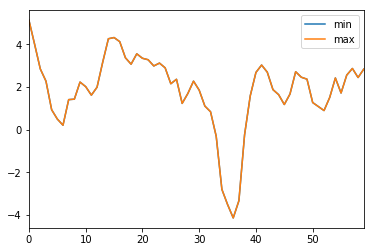

In [24]:
# Create min/max GDP for each period to plot to see if they are the same for each of the 60 periods
gdp = df.groupby('time')['gdp_time'].agg({'min':'min','max':'max'}).reset_index().iloc[:, 1:3]
gdp.plot()
plt.show()

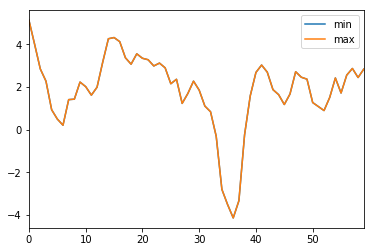

In [25]:
# Plot min/max of each period's reported GDP to make sure there are no differences
gdp.reset_index().iloc[:, 1:3].plot()
plt.show()

In [14]:
# Create min/mean/max interest rate for each period
ir = df.groupby('time')['interest_rate_time'].agg({'min':'min',
                                                   'mean':'mean',
                                                   'max':'max'})

C:\Users\andre\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


In [15]:
ir

,min,mean,max
time,,,
1,6.500,9.912191,15.550
2,6.500,10.150081,15.550
3,6.500,10.225566,15.550
4,6.500,10.236245,15.550
5,6.500,10.255770,15.550
6,6.500,10.339478,15.550
7,6.500,10.305062,15.550
8,6.500,10.280959,15.550
9,6.500,10.119854,15.550


In [16]:
ir.head()

,min,mean,max
time,,,
1,6.5,9.912191,15.55
2,6.5,10.150081,15.55
3,6.5,10.225566,15.55
4,6.5,10.236245,15.55
5,6.5,10.255770,15.55


In [17]:
# Create min/max GDP for each period to plot to see if they are the same for each of the 60 periods
gdp = df.groupby('time')['gdp_time'].agg({'min':'min','max':'max'}).reset_index().iloc[:, 1:3]
gdp.plot()

C:\Users\andre\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


In [18]:
# Plot min/max of each period's reported GDP to make sure there are no differences
gdp.reset_index().iloc[:, 1:3].plot()

In [19]:
# Create min/mean/max interest rate for each period
ir = df.groupby('time')['interest_rate_time'].agg({'min':'min',
                                                   'mean':'mean',
                                                   'max':'max'})

C:\Users\andre\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


In [20]:
ir.head()

,min,mean,max
time,,,
1,6.5,9.912191,15.55
2,6.5,10.150081,15.55
3,6.5,10.225566,15.55
4,6.5,10.236245,15.55
5,6.5,10.255770,15.55


In [21]:
df_uniq = pd.DataFrame(df.groupby("id")["Interest_Rate_orig_time"].mean().reset_index())

In [22]:
df_uniq.head()

,id,Interest_Rate_orig_time
0,1,9.200
1,2,7.680
2,3,8.750
3,4,10.500
4,5,9.155


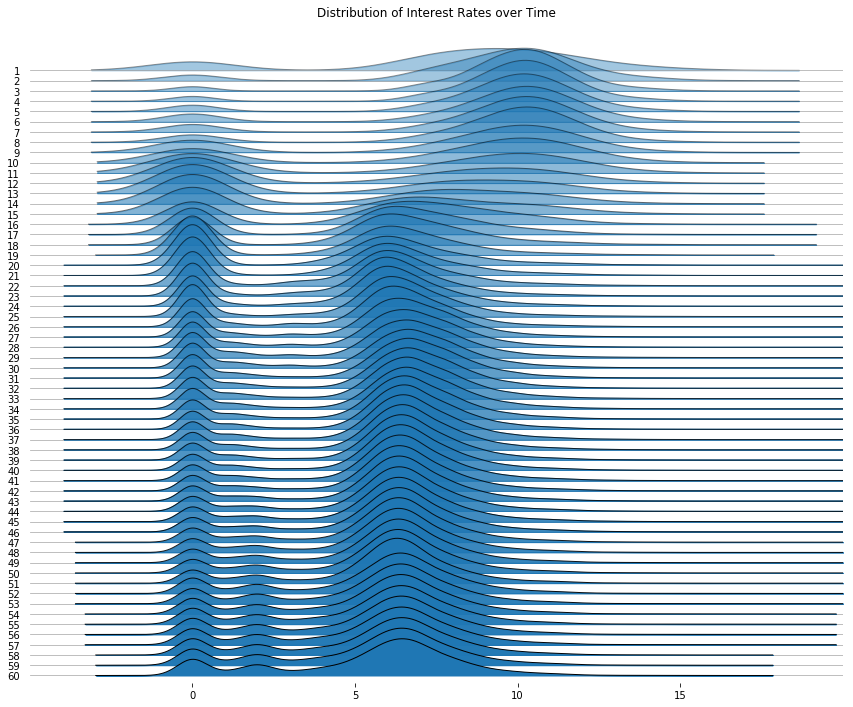

In [23]:
%matplotlib inline

fig, axes = joypy.joyplot(df, by="time", column="Interest_Rate_orig_time", range_style='own',
                          grid="y", linewidth=1, legend=False, fade=True, figsize=(12,10),
                          title="Distribution of Interest Rates over Time",
                          kind="kde", bins=20,
                          x_range=[-5,20])